# Delta Equity 45 Days

Usage in C2Score: `+ ( %[Delta Equity 45 Days]% < 0 ?  -200 :  0 )`

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        5170      187633-3434647.9000     -2.8000      0.0000    112.5260      4.10003434442.3000  20075.3324 


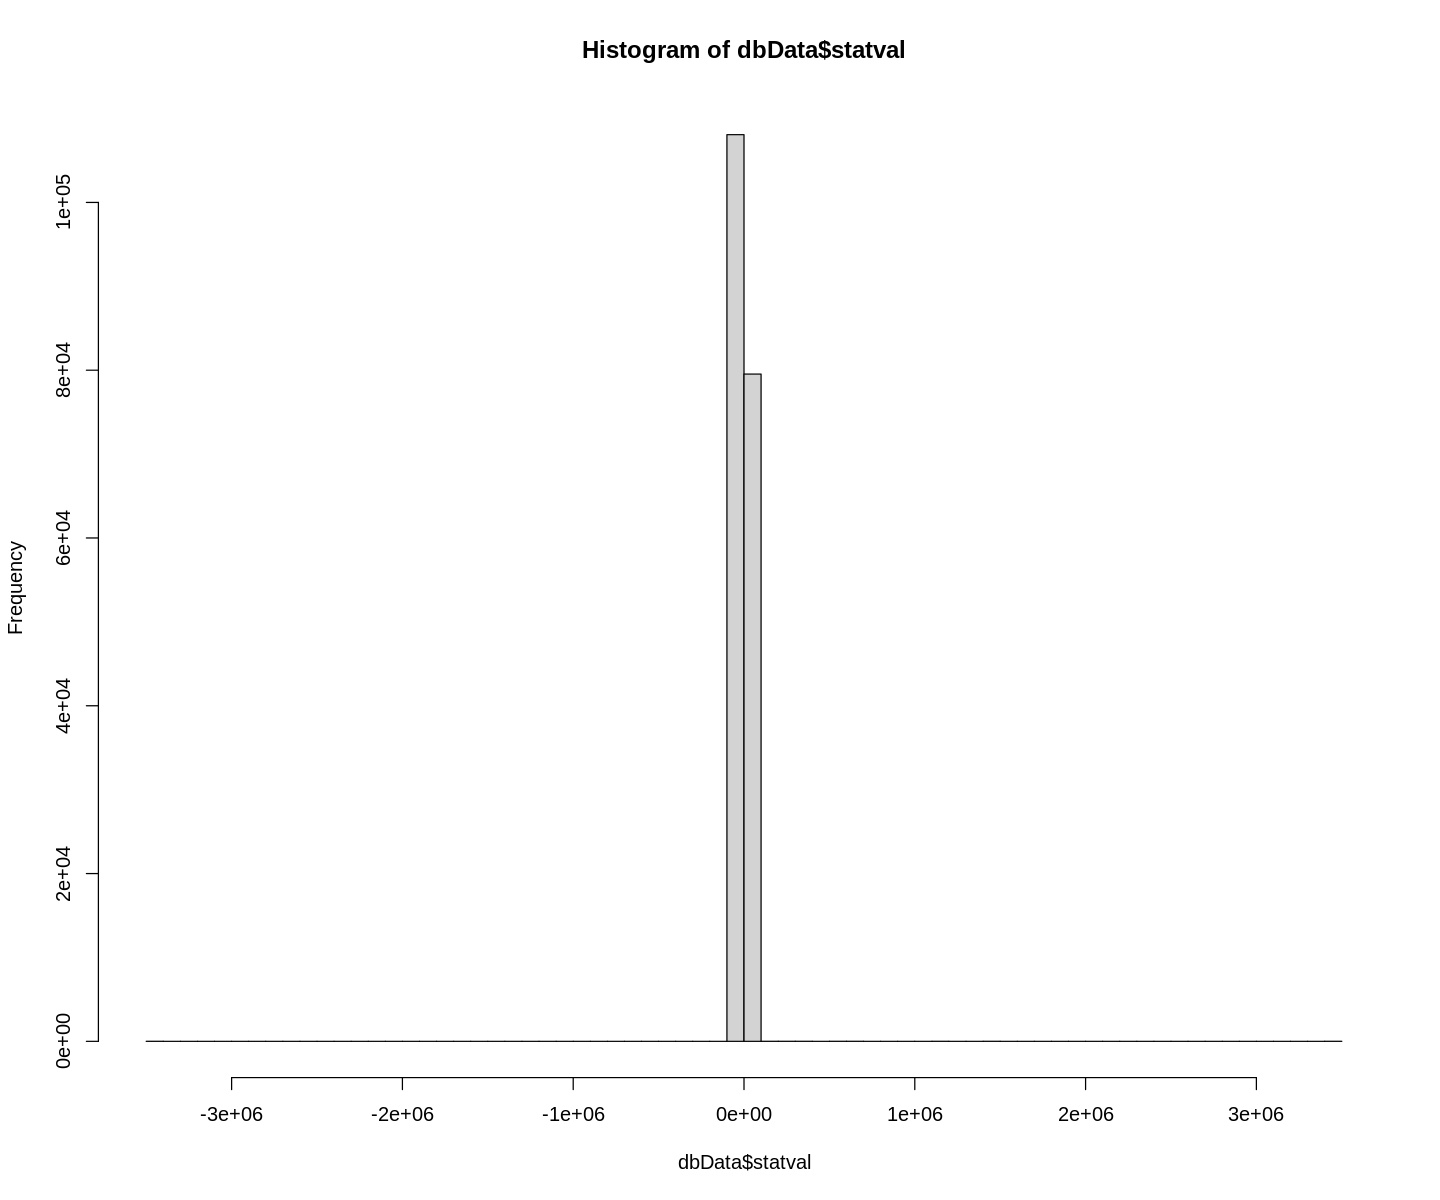

In [2]:
# What data we have.
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='deltaequityp45'") 
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        4952      179268    -50.0000     -2.4000      0.0000      0.4922      3.8000     50.0000     11.3427 


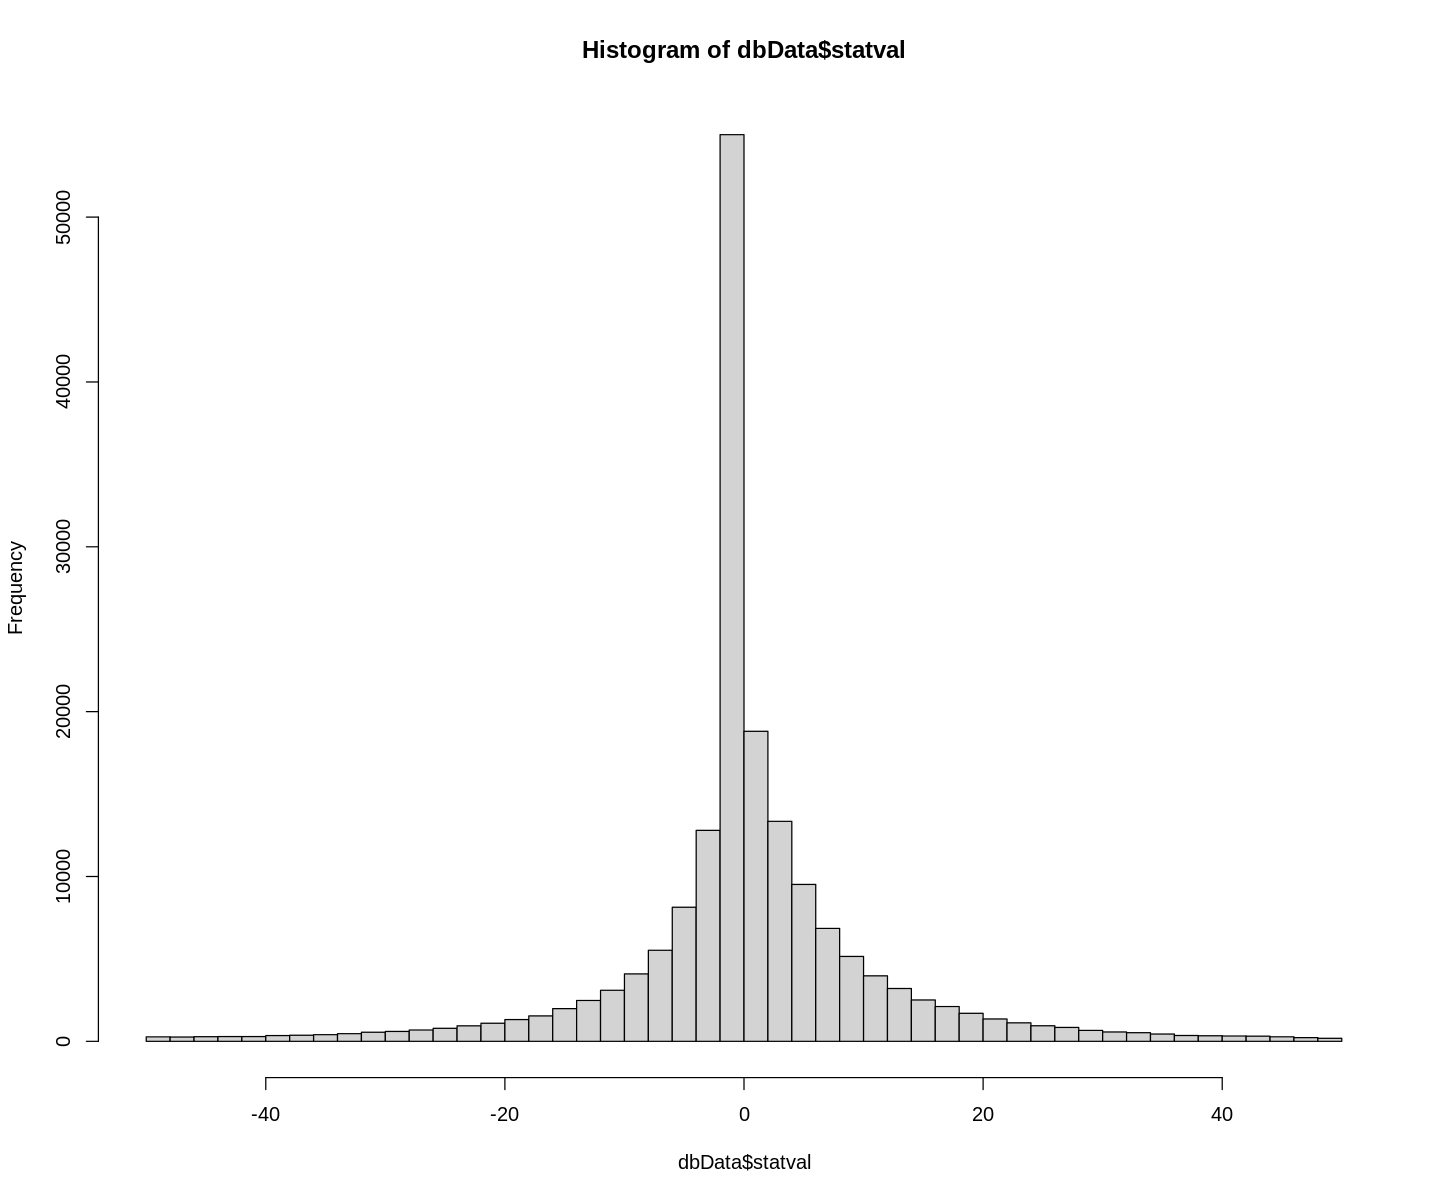

In [3]:
# Delta equity 45 days (1.5 month)? Somewhere between -50 and +50 percent
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='deltaequityp45' 
            and statval >= -50 and statval <= 50")
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1658       32363      0.1000      2.1000      5.1000      7.8633     10.7000     50.0000      8.1973 


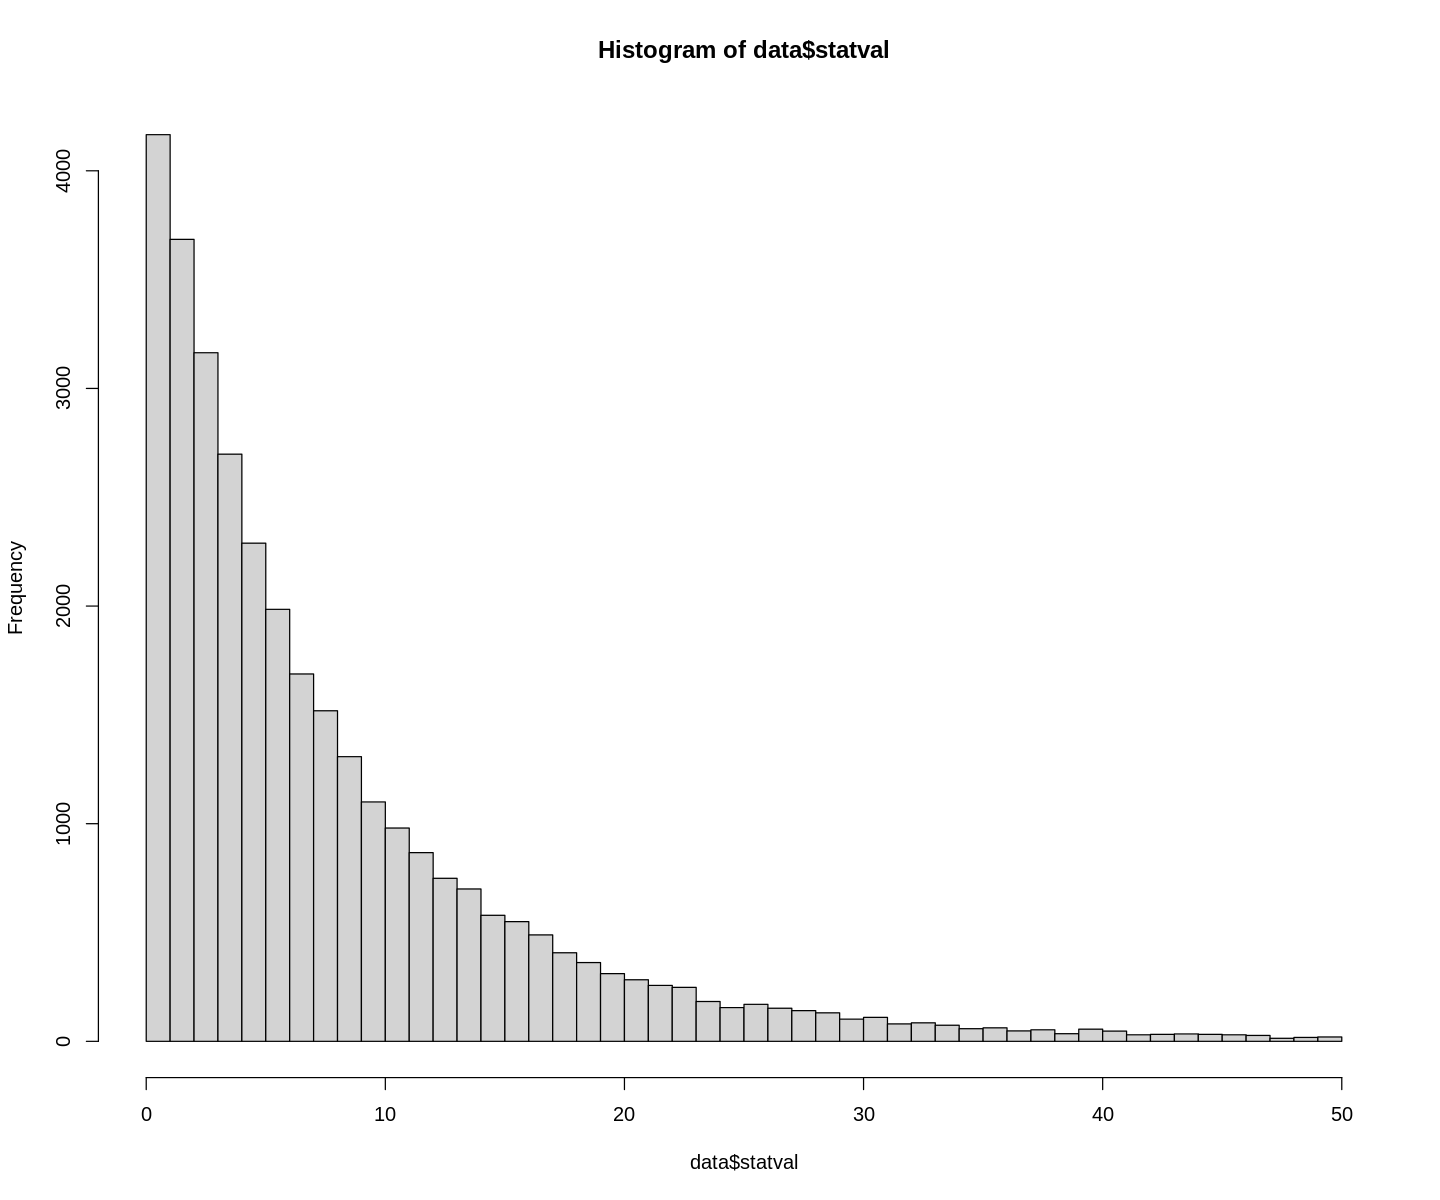

In [4]:
# Join with cleaned data. We want just positive values.
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='deltaequityp45' and  statval > 0 and statval <= 50"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1658       32363      0.1000      2.1000      5.1000      7.8633     10.7000     50.0000      8.1973 



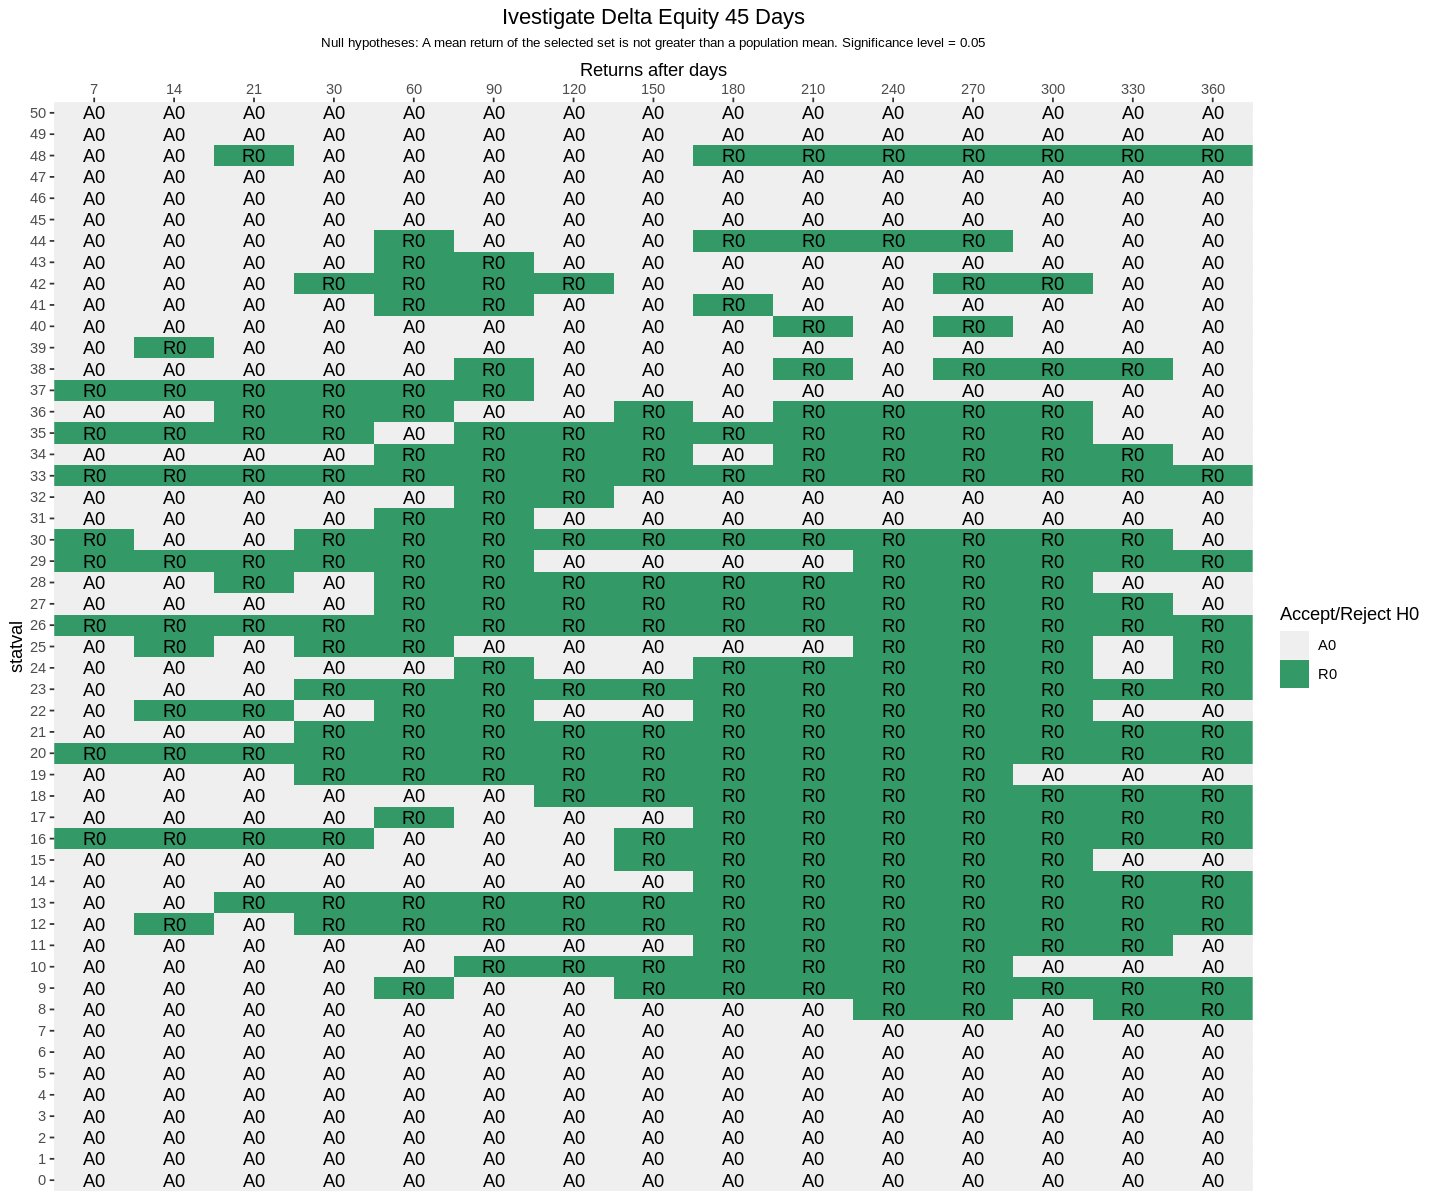

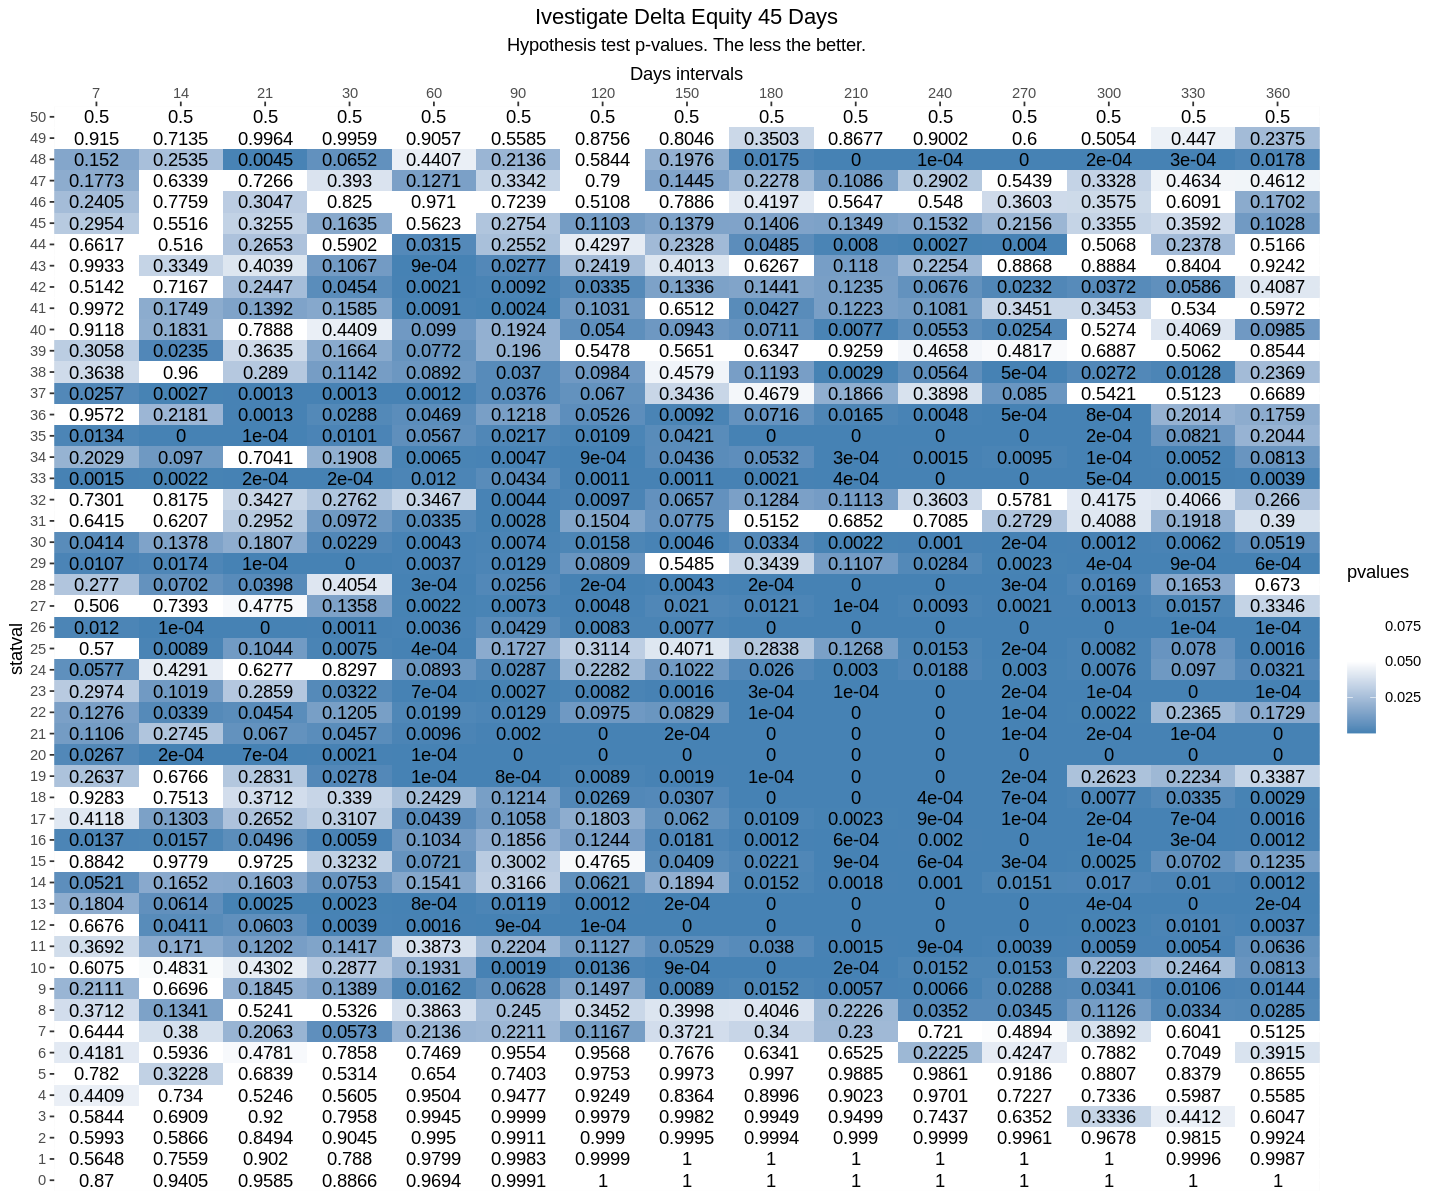

In [5]:
experiment = list(
  name = "deltaequityp45",
  description = "Ivestigate Delta Equity 45 Days",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 50, by = 1))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


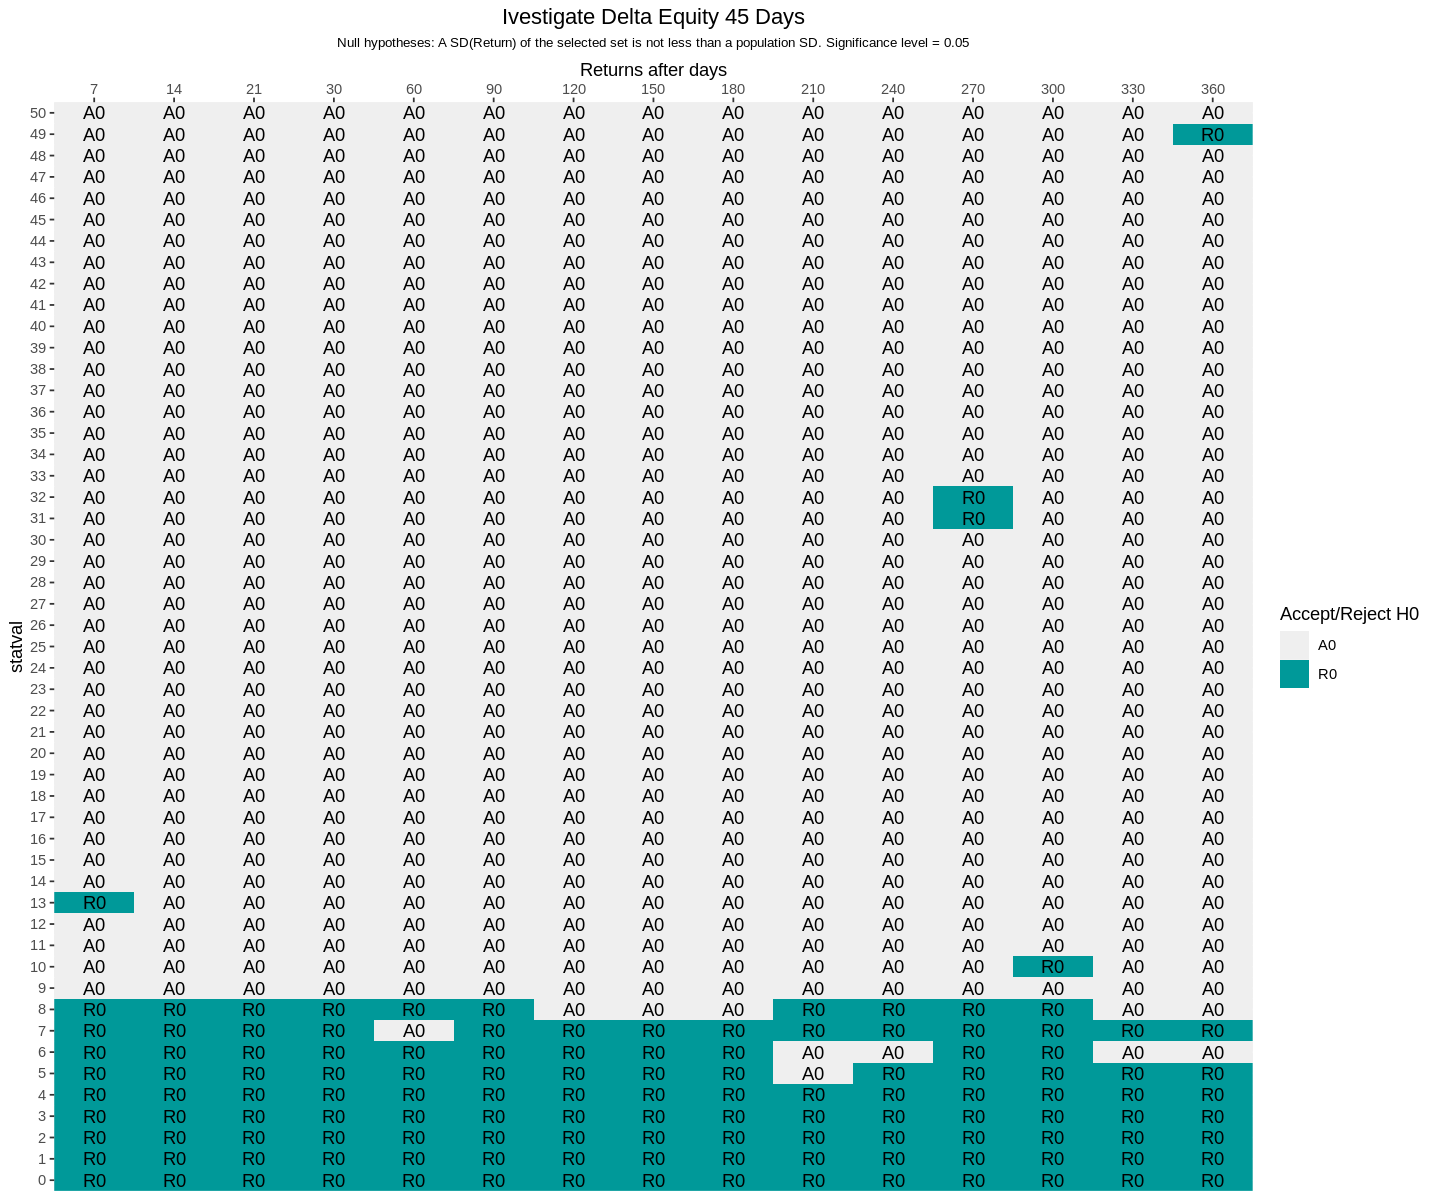

In [6]:
showSDLessHypothesisTest(experiment, result)

In [7]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection          Obs007 Obs014 Obs021 Obs030 Obs060 Obs090 Obs120 Obs150
1  49 <= statval < 50   21     21     21     19     18      9      8      8  
2  48 <= statval < 49   17     16     16     16     16     13     11     10  
3  47 <= statval < 48   15     15     15     15     13     10      7      7  
4  46 <= statval < 47   27     27     26     26     21     16     12     11  
5  45 <= statval < 46   27     26     26     26     21     18     16     16  
6  44 <= statval < 45   34     34     33     30     28     23     23     19  
7  43 <= statval < 44   33     32     31     30     26     24     20     17  
8  42 <= statval < 43   31     31     27     26     21     16     10      8  
9  41 <= statval < 42   34     33     33     33     24     21     17     17  
10 40 <= statval < 41   47     44     43     41     37     31     26     23  
11 39 <= statval < 40   51     49     49     46     40     32     27     23  
12 38 <= statval < 39   41     41     40     39     36     30     24     18  
13 37 <= statval < 38   49     48     48     46     41     36     31     26  
14 36 <= statval < 37   51     50     47     47     42     39     31     30  
15 35 <= statval < 36   60     60     60     60     57     51     39     37  
16 34 <= statval < 35   57     56     55     51     40     33     25     23  
17 33 <= statval < 34   75     73     73     71     65     51     43     40  
18 32 <= statval < 33   78     78     77     73     67     61     52     50  
19 31 <= statval < 32   87     87     85     81     67     59     49     45  
20 30 <= statval < 31  103    100     98     95     78     66     59     52  
21 29 <= statval < 30  105    103     97     96     86     76     67     61  
22 28 <= statval < 29  131    131    127    125    106     87     76     67  
23 27 <= statval < 28  141    138    137    134    122    108     93     82  
24 26 <= statval < 27  153    151    146    142    127    100     86     78  
25 25 <= statval < 26  159    158    155    154    134    114     99     88  
26 24 <= statval < 25  171    168    168    166    139    124    112     99  
27 23 <= statval < 24  172    171    167    163    150    137    116    103  
28 22 <= statval < 23  250    241    238    232    206    177    158    131  
29 21 <= statval < 22  261    260    257    253    223    203    176    143  
30 20 <= statval < 21  279    274    271    266    233    201    178    150  
31 19 <= statval < 20  319    318    315    309    285    246    216    196  
32 18 <= statval < 19  346    345    339    328    295    251    218    189  
33 17 <= statval < 18  410    401    397    386    346    291    251    224  
34 16 <= statval < 17  497    490    480    467    421    361    311    272  
35 15 <= statval < 16  544    536    527    511    464    415    360    320  
36 14 <= statval < 15  581    572    565    555    499    429    375    339  
37 13 <= statval < 14  694    683    666    645    581    487    439    391  
38 12 <= statval < 13  755    746    732    719    651    567    505    456  
39 11 <= statval < 12  865    859    844    832    756    660    578    515  
40 10 <= statval < 11  962    952    935    913    815    697    619    551  
41 9 <= statval < 10  1117   1106   1087   1064    960    834    737    658  
42 8 <= statval < 9   1324   1305   1282   1243   1134    957    848    772  
43 7 <= statval < 8   1493   1471   1448   1419   1297   1138   1018    928  
44 6 <= statval < 7   1729   1712   1689   1660   1500   1332   1218   1115  
45 5 <= statval < 6   1954   1921   1894   1845   1701   1503   1371   1244  
46 4 <= statval < 5   2317   2284   2241   2202   2017   1797   1613   1450  
47 3 <= statval < 4   2714   2672   2637   2560   2322   2055   1836   1651  
48 2 <= statval < 3   3161   3103   3053   2974   2695   2366   2094   1893  
49 1 <= statval < 2   3704   3643   3584   3498   3182   2803   2513   2258  
50 0 <= statval < 1   3658   3580   3501   3396   3041   2670   2411   2147  
   Obs180 Obs210 Obs240 O


SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



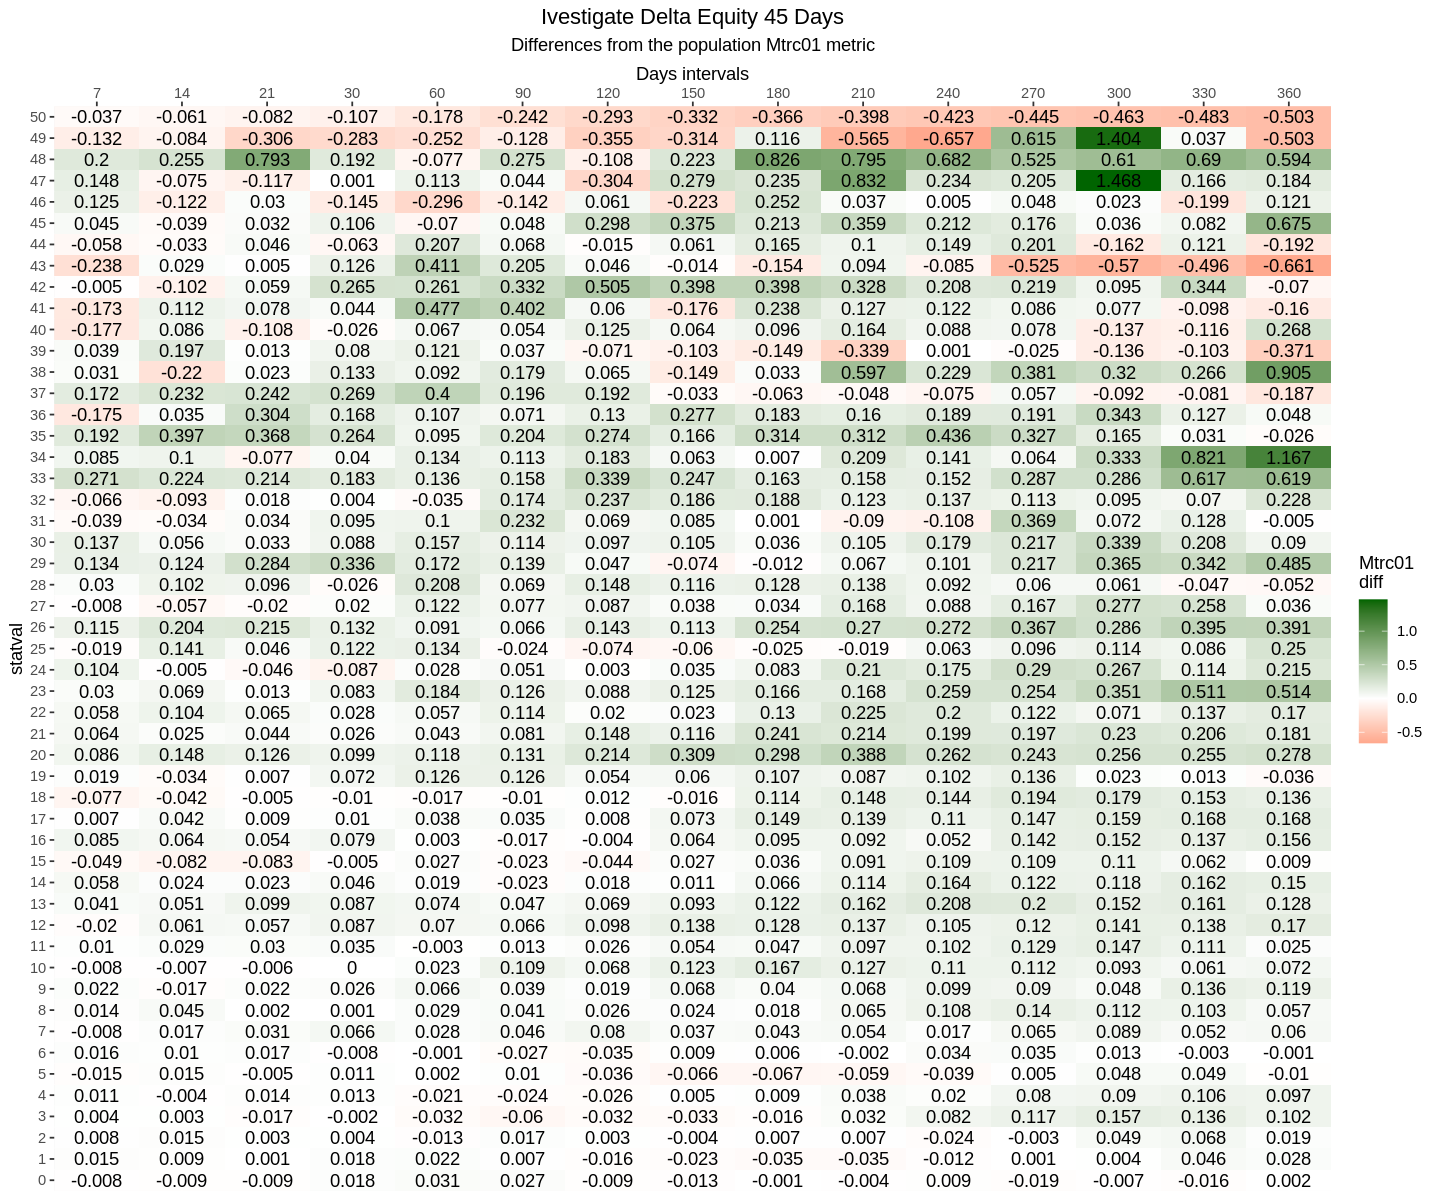

In [8]:
showMetricDifferences(experiment, result)

In [9]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection          Sys007 Sys014 Sys021 Sys030 Sys060 Sys090 Sys120 Sys150
1  49 <= statval < 50  19     19     19     17     16      9      8      8   
2  48 <= statval < 49  16     15     15     15     15     12     11     10   
3  47 <= statval < 48  15     15     15     15     13     10      7      7   
4  46 <= statval < 47  26     26     25     25     20     16     12     11   
5  45 <= statval < 46  24     23     23     23     18     16     14     14   
6  44 <= statval < 45  28     28     27     24     22     18     18     16   
7  43 <= statval < 44  31     30     29     28     24     22     19     16   
8  42 <= statval < 43  27     27     24     23     20     15      9      7   
9  41 <= statval < 42  33     32     32     32     23     20     16     16   
10 40 <= statval < 41  42     39     38     38     34     28     24     21   
11 39 <= statval < 40  46     44     44     42     37     30     25     21   
12 38 <= statval < 39  40     40     39     38     35     29     23     17   
13 37 <= statval < 38  46     45     45     43     38     33     28     23   
14 36 <= statval < 37  49     48     45     45     40     37     31     30   
15 35 <= statval < 36  49     49     49     49     46     43     31     29   
16 34 <= statval < 35  53     52     51     48     37     30     23     21   
17 33 <= statval < 34  65     64     64     62     58     45     38     35   
18 32 <= statval < 33  66     66     65     61     56     50     42     40   
19 31 <= statval < 32  77     77     75     71     59     51     41     37   
20 30 <= statval < 31  85     84     83     82     69     58     53     46   
21 29 <= statval < 30  90     89     83     82     74     65     58     53   
22 28 <= statval < 29 102    102     98     96     81     67     59     51   
23 27 <= statval < 28 108    107    106    103     92     79     69     62   
24 26 <= statval < 27 130    128    124    120    109     86     76     68   
25 25 <= statval < 26 130    129    126    125    109     94     82     73   
26 24 <= statval < 25 133    130    130    128    108     98     91     82   
27 23 <= statval < 24 137    136    133    129    116    105     87     79   
28 22 <= statval < 23 188    181    178    174    153    127    114     95   
29 21 <= statval < 22 197    197    194    192    166    150    132    105   
30 20 <= statval < 21 194    190    188    185    163    139    125    106   
31 19 <= statval < 20 226    225    222    218    199    169    148    131   
32 18 <= statval < 19 244    243    238    229    201    170    152    134   
33 17 <= statval < 18 272    264    261    253    220    184    158    142   
34 16 <= statval < 17 318    314    308    302    266    228    203    174   
35 15 <= statval < 16 353    347    341    329    290    260    229    200   
36 14 <= statval < 15 344    335    331    325    284    242    212    197   
37 13 <= statval < 14 409    404    396    380    338    276    248    221   
38 12 <= statval < 13 451    446    436    429    385    330    299    265   
39 11 <= statval < 12 480    476    467    459    410    354    301    273   
40 10 <= statval < 11 531    522    511    500    431    365    323    291   
41 9 <= statval < 10  584    576    564    546    490    403    360    327   
42 8 <= statval < 9   644    631    615    593    525    439    388    353   
43 7 <= statval < 8   683    670    655    642    571    487    424    384   
44 6 <= statval < 7   721    710    706    696    613    518    453    408   
45 5 <= statval < 6   771    758    747    721    657    554    493    445   
46 4 <= statval < 5   839    823    803    788    706    614    535    479   
47 3 <= statval < 4   884    869    859    824    715    618    554    489   
48 2 <= statval < 3   961    941    925    888    784    667    573    500   
49 1 <= statval < 2   986    966    950    925    809    685    600    526   
50 0 <= statval < 1   975    953    931    904    786    679    610    526   
   Sys180 Sys210 Sys240 S

### Discussion

.....................

## Age > 90

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1381       26618      0.1000      2.0000      4.9000      7.5246     10.3000     50.0000      7.8444 


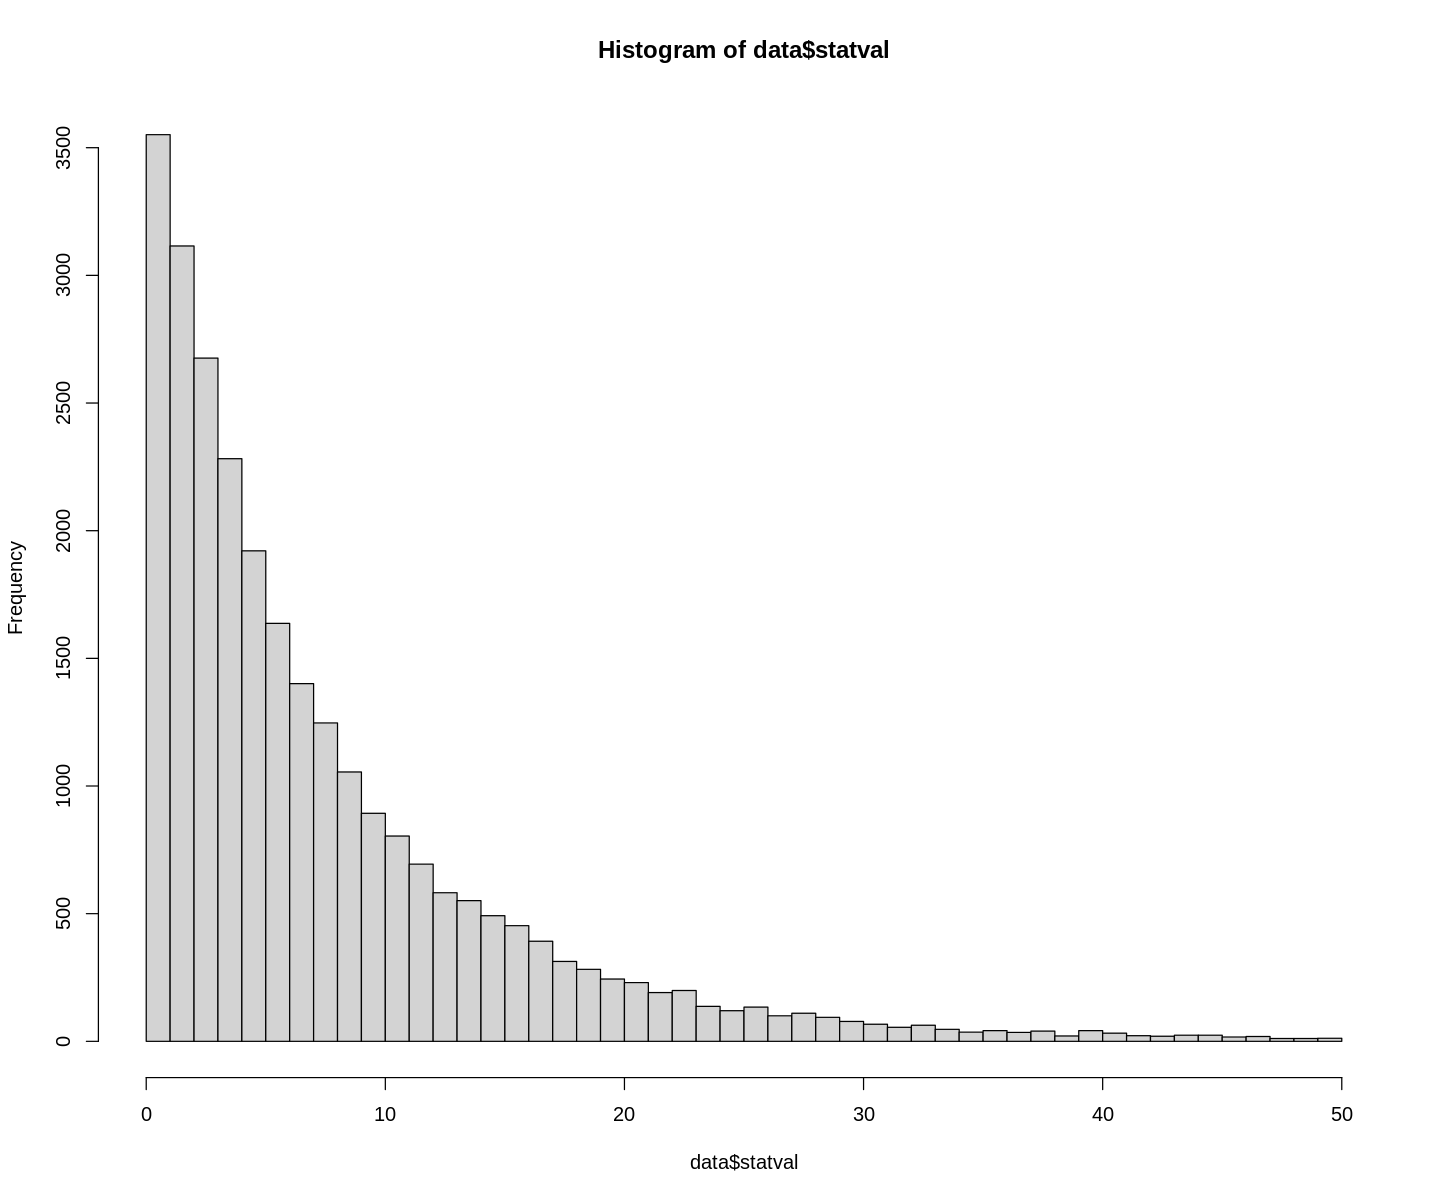

In [10]:
# Join with cleaned data. We want just positive values.
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='deltaequityp45' and  statval > 0 and statval <= 50 and Age > 90"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1381       26618      0.1000      2.0000      4.9000      7.5246     10.3000     50.0000      7.8444 



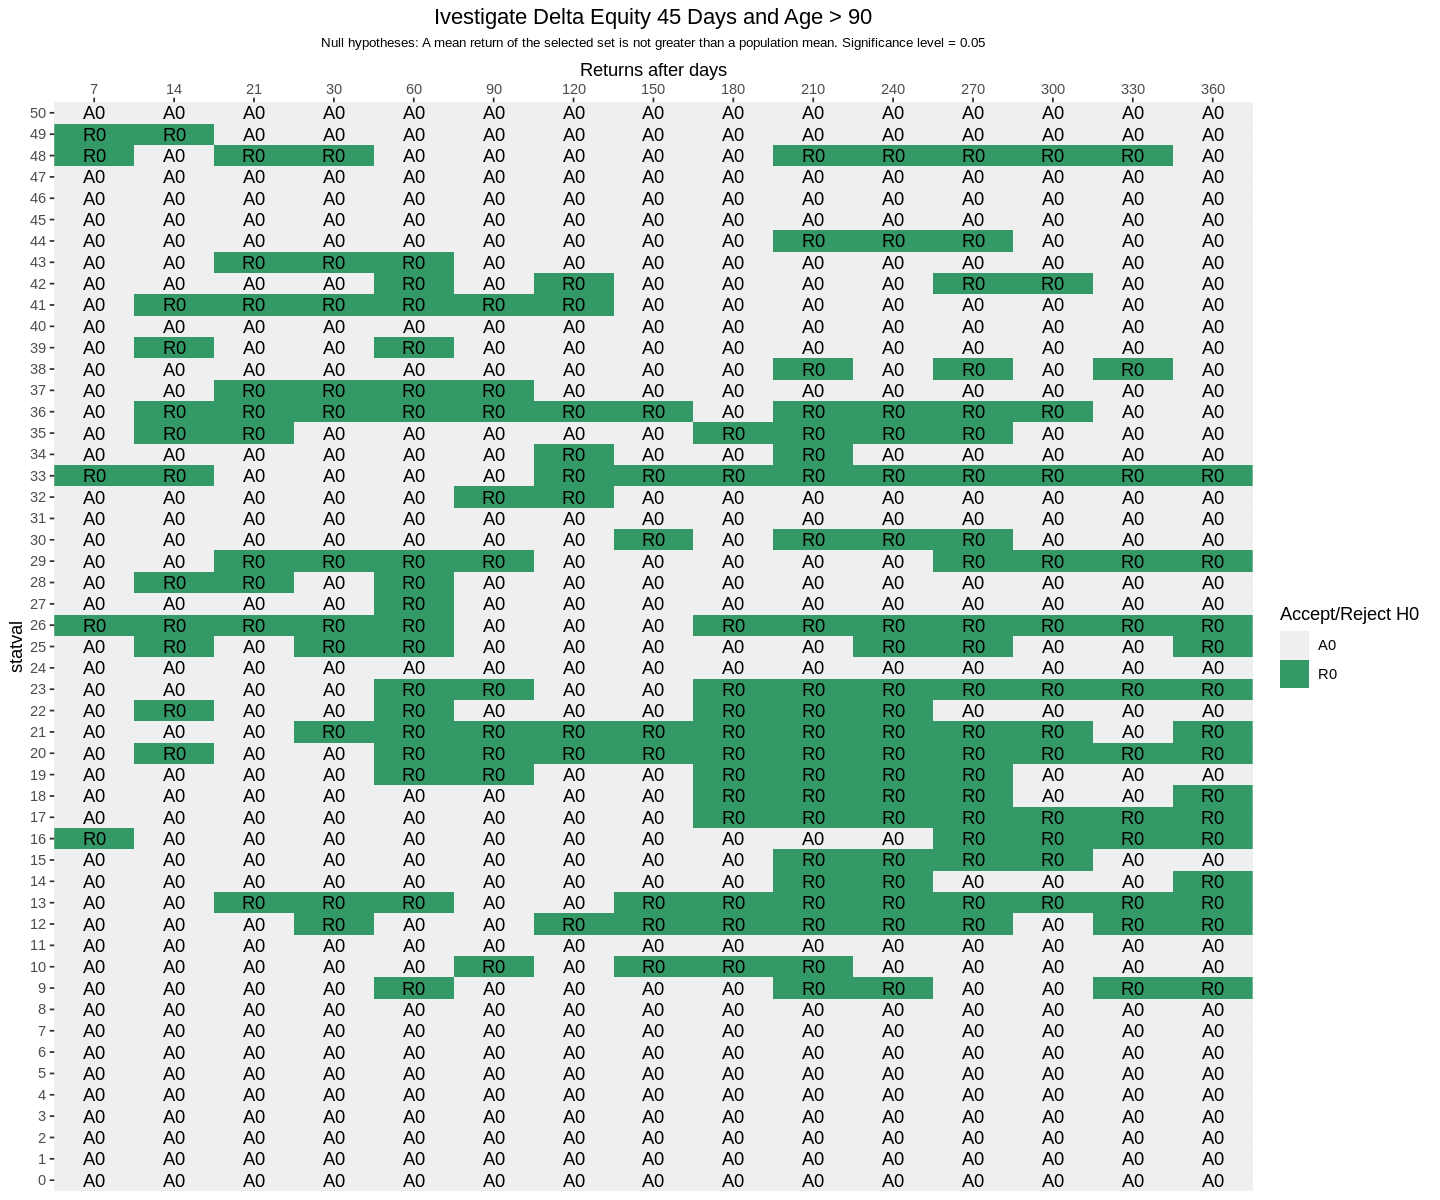

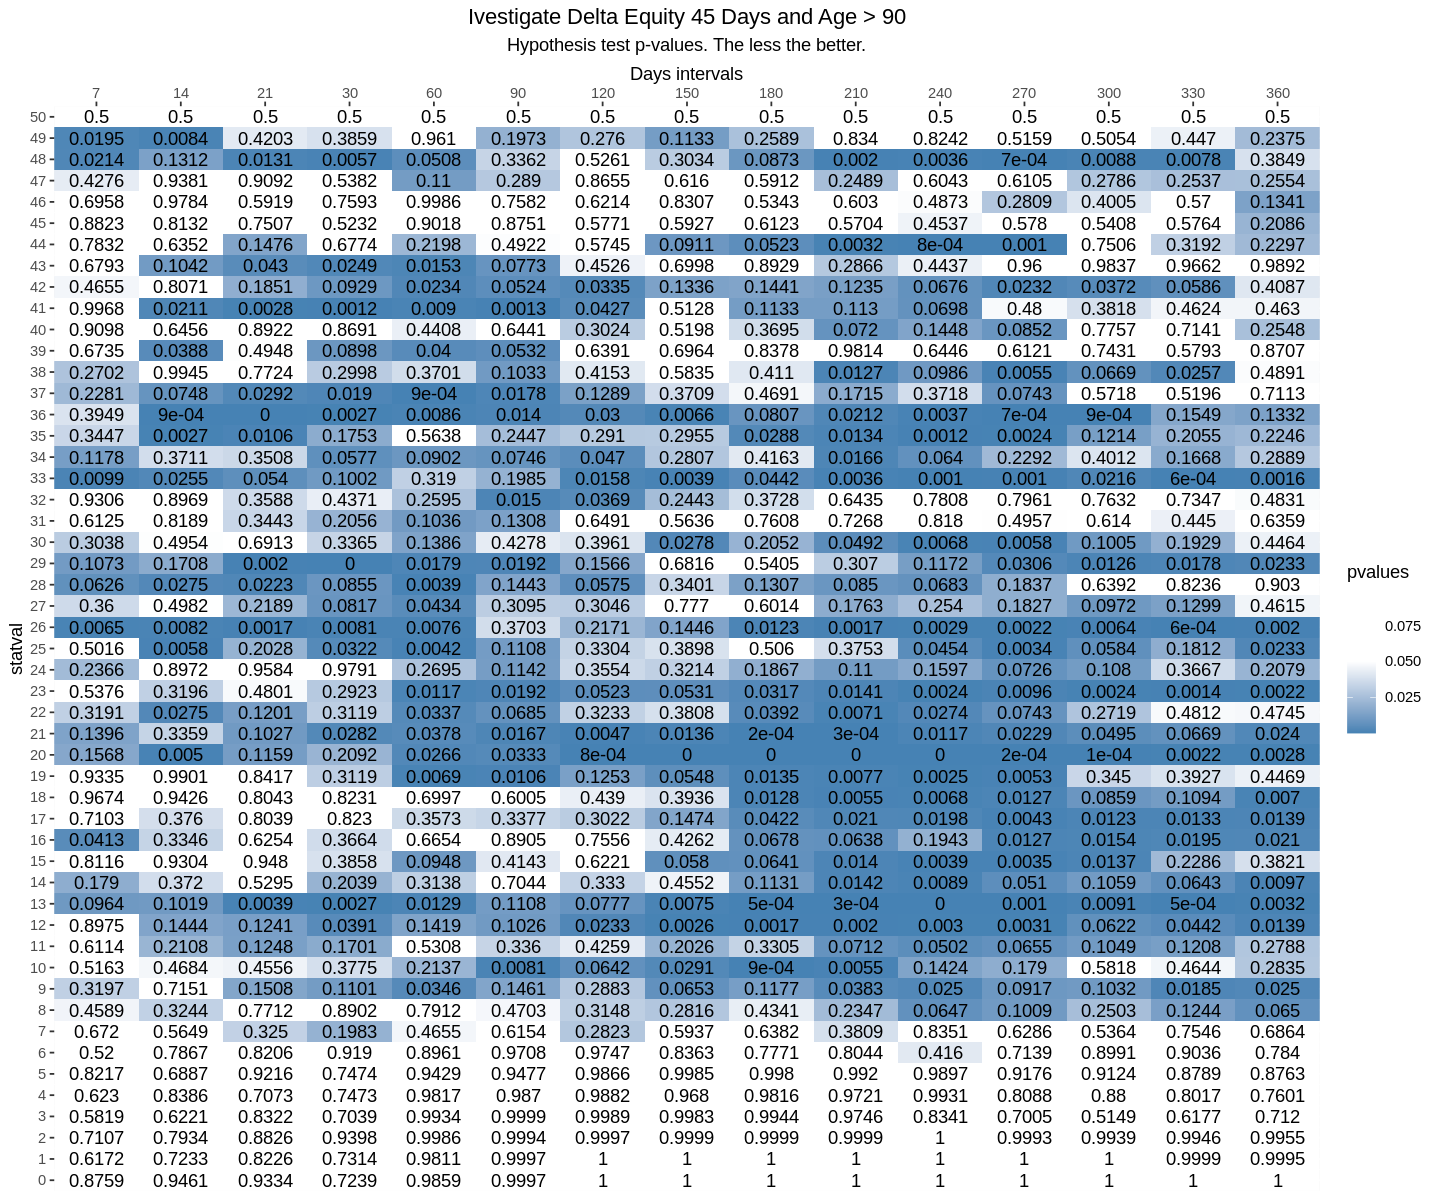

In [11]:
experiment = list(
  name = "deltaequityp45 and Age > 90",
  description = "Ivestigate Delta Equity 45 Days and Age > 90",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 50, by = 1))
result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


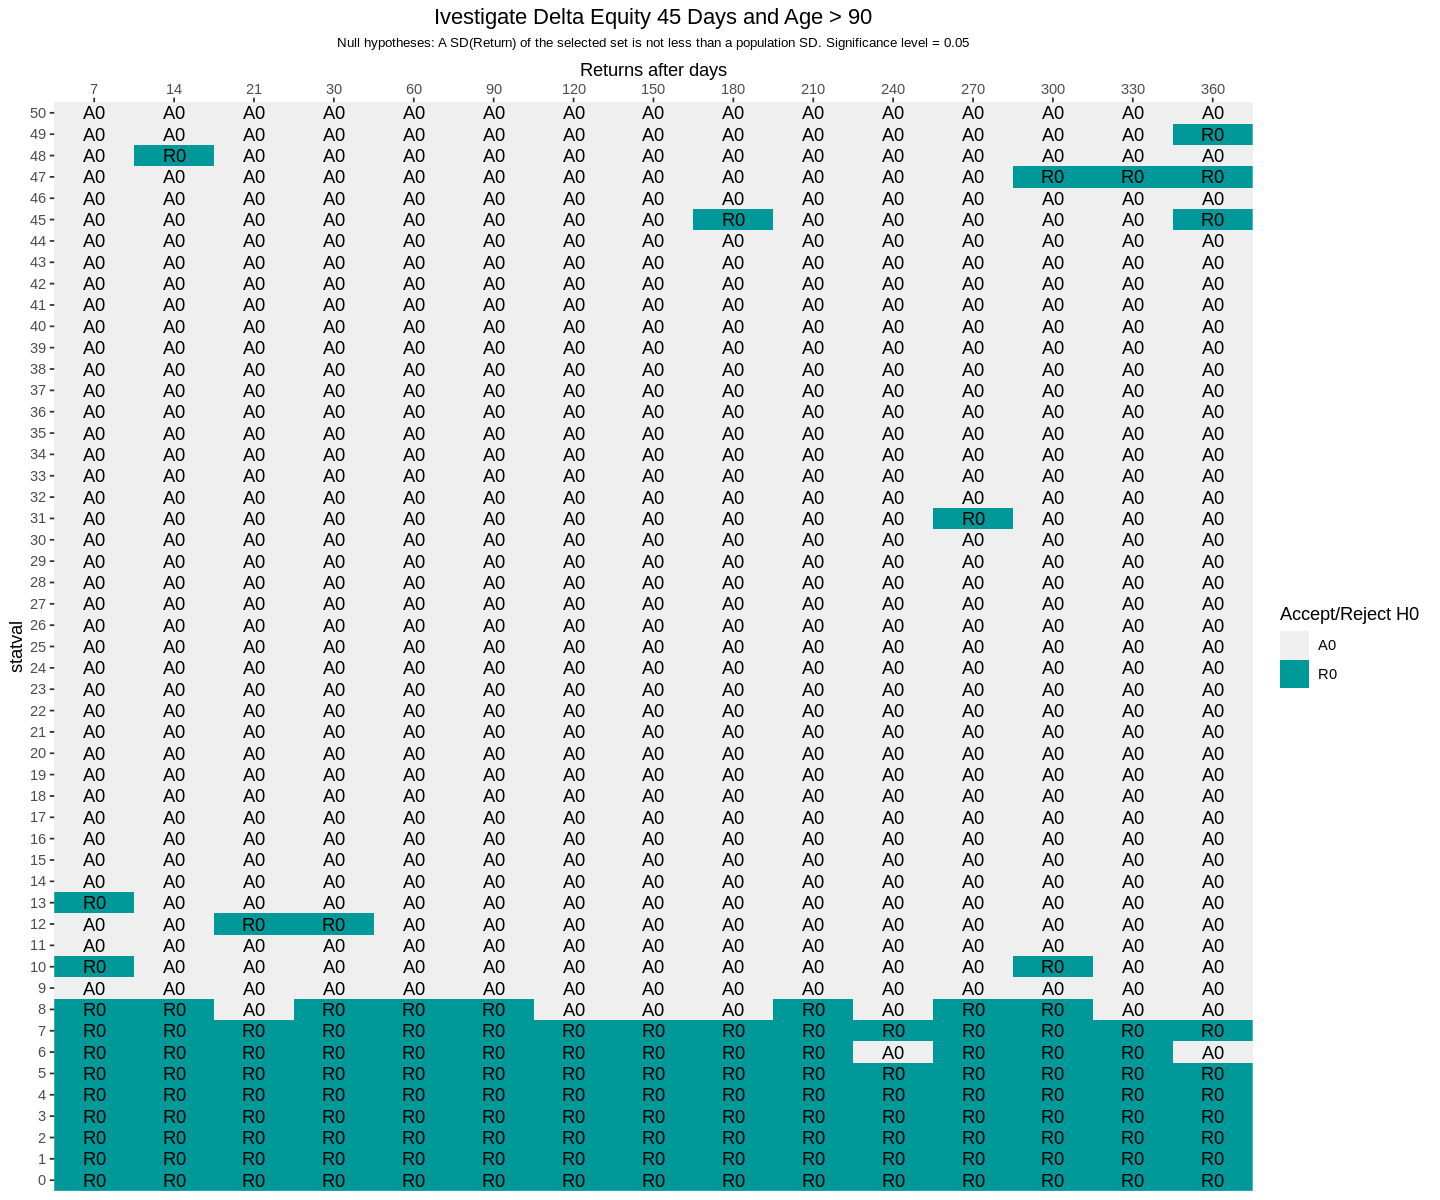

In [12]:
showSDLessHypothesisTest(experiment, result)

In [13]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection          Obs007 Obs014 Obs021 Obs030 Obs060 Obs090 Obs120 Obs150
1  49 <= statval < 50   12     12     12     11     11      6      5      5  
2  48 <= statval < 49   11     11     11     11     11      9      8      7  
3  47 <= statval < 48   10     10     10     10      8      6      4      4  
4  46 <= statval < 47   19     19     18     18     14     12      9      8  
5  45 <= statval < 46   16     15     15     15     12     12     11     11  
6  44 <= statval < 45   26     26     25     25     23     18     18     14  
7  43 <= statval < 44   22     22     22     21     20     19     15     13  
8  42 <= statval < 43   20     20     18     17     12     11     10      8  
9  41 <= statval < 42   23     22     22     22     16     14     12     12  
10 40 <= statval < 41   35     34     33     33     30     26     21     19  
11 39 <= statval < 40   37     36     36     34     31     25     23     19  
12 38 <= statval < 39   24     24     23     22     20     18     14     10  
13 37 <= statval < 38   38     37     37     35     32     29     26     23  
14 36 <= statval < 37   34     33     31     31     28     26     22     21  
15 35 <= statval < 36   43     43     43     43     41     36     28     27  
16 34 <= statval < 35   36     35     34     32     25     20     15     13  
17 33 <= statval < 34   49     48     48     47     43     34     29     26  
18 32 <= statval < 33   55     55     54     51     48     47     41     40  
19 31 <= statval < 32   57     57     55     55     47     42     35     33  
20 30 <= statval < 31   64     61     60     57     49     44     39     34  
21 29 <= statval < 30   80     78     73     72     64     56     50     45  
22 28 <= statval < 29   95     95     91     89     77     65     57     51  
23 27 <= statval < 28  104    101    100     98     93     82     71     61  
24 26 <= statval < 27  106    104    100     97     92     72     62     56  
25 25 <= statval < 26  125    124    121    120    106     92     81     70  
26 24 <= statval < 25  133    130    130    128    110    100     89     80  
27 23 <= statval < 24  130    129    125    123    112    102     85     76  
28 22 <= statval < 23  194    185    182    177    158    137    121    100  
29 21 <= statval < 22  199    198    196    192    175    161    139    111  
30 20 <= statval < 21  225    221    219    214    189    161    141    119  
31 19 <= statval < 20  246    245    242    237    222    198    175    157  
32 18 <= statval < 19  272    272    266    256    233    205    180    157  
33 17 <= statval < 18  312    305    301    291    264    228    205    185  
34 16 <= statval < 17  404    397    388    377    345    300    256    229  
35 15 <= statval < 16  449    442    437    424    392    356    309    273  
36 14 <= statval < 15  478    469    464    458    418    361    320    288  
37 13 <= statval < 14  551    541    526    509    469    399    364    323  
38 12 <= statval < 13  588    581    571    563    520    458    409    374  
39 11 <= statval < 12  691    685    674    665    609    546    488    438  
40 10 <= statval < 11  785    778    763    747    675    595    534    475  
41 9 <= statval < 10   910    899    882    861    795    715    642    575  
42 8 <= statval < 9   1055   1041   1022    991    917    788    706    640  
43 7 <= statval < 8   1235   1216   1199   1174   1086    965    869    794  
44 6 <= statval < 7   1433   1420   1398   1371   1252   1140   1062    976  
45 5 <= statval < 6   1608   1578   1554   1522   1413   1271   1173   1066  
46 4 <= statval < 5   1932   1907   1871   1841   1703   1535   1395   1251  
47 3 <= statval < 4   2295   2254   2225   2166   1989   1780   1607   1457  
48 2 <= statval < 3   2679   2628   2591   2523   2302   2048   1822   1660  
49 1 <= statval < 2   3125   3068   3021   2950   2720   2429   2205   1996  
50 0 <= statval < 1   3106   3036   2964   2881   2604   2310   2093   1892  
   Obs180 Obs210 Obs240 O


SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



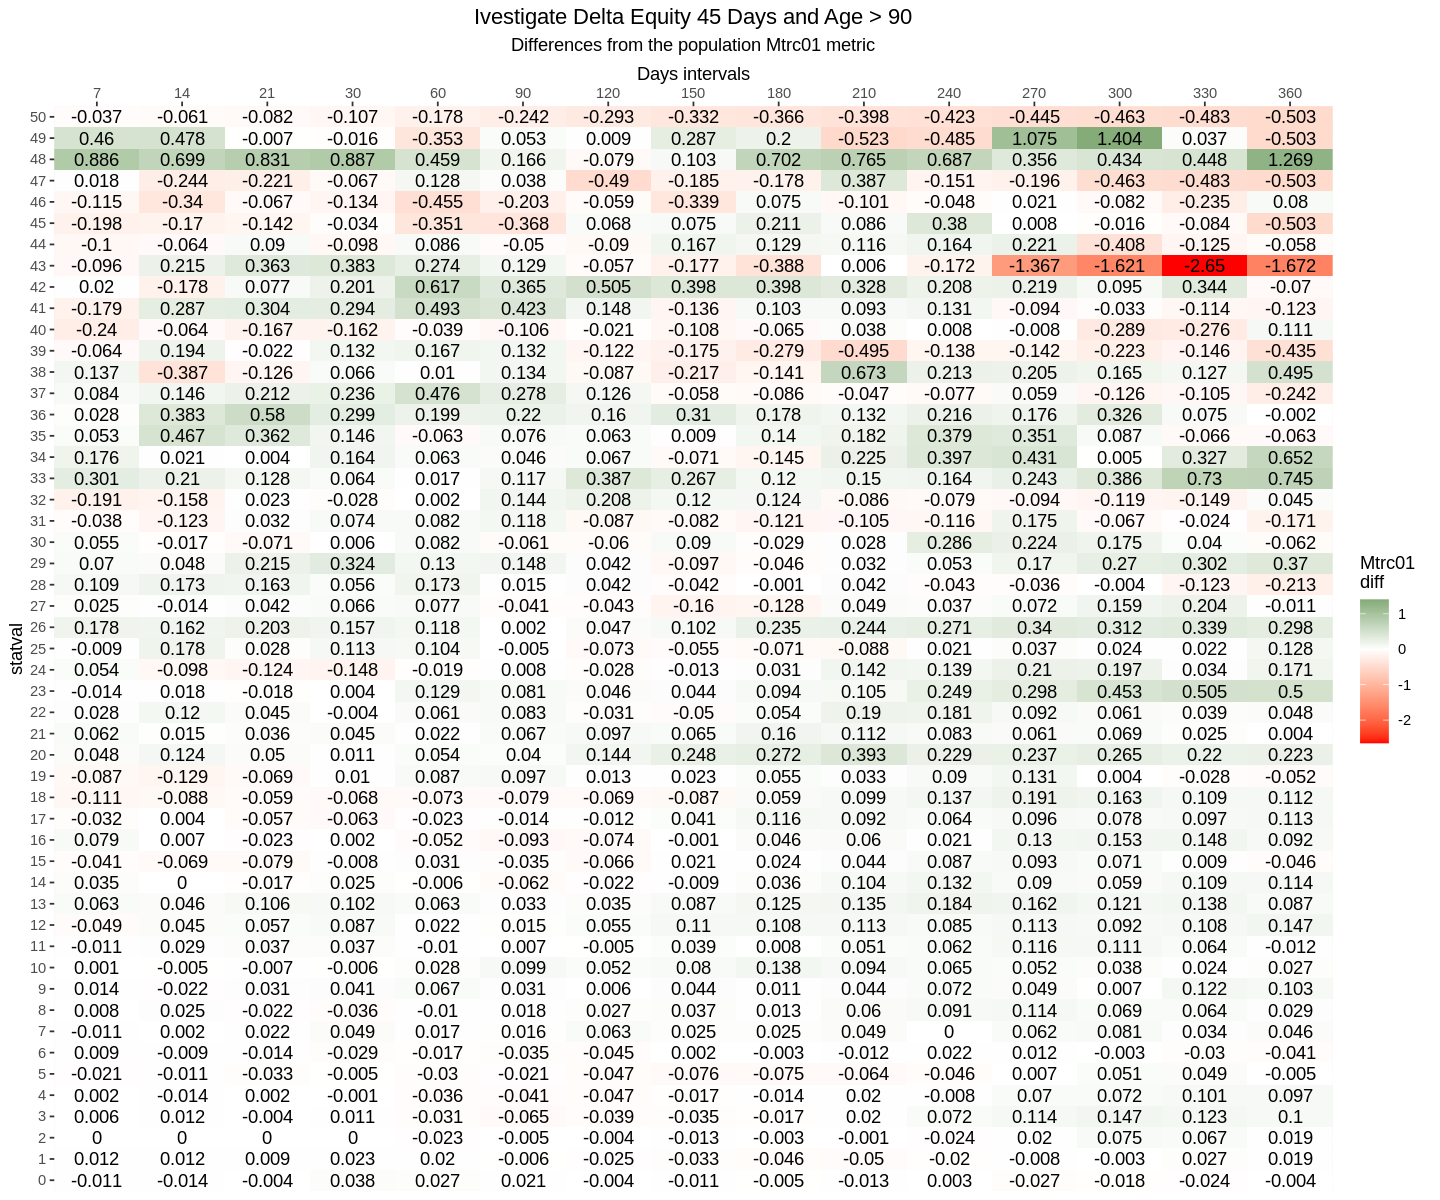

In [14]:
showMetricDifferences(experiment, result)

In [15]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection          Sys007 Sys014 Sys021 Sys030 Sys060 Sys090 Sys120 Sys150
1  49 <= statval < 50  10     10     10      9      9      6      5      5   
2  48 <= statval < 49  10     10     10     10     10      8      8      7   
3  47 <= statval < 48  10     10     10     10      8      6      4      4   
4  46 <= statval < 47  19     19     18     18     14     12      9      8   
5  45 <= statval < 46  14     13     13     13     10     10      9      9   
6  44 <= statval < 45  22     22     21     21     19     14     14     12   
7  43 <= statval < 44  20     20     20     19     18     17     14     12   
8  42 <= statval < 43  17     17     16     15     11     10      9      7   
9  41 <= statval < 42  22     21     21     21     15     13     11     11   
10 40 <= statval < 41  33     32     31     31     28     24     20     18   
11 39 <= statval < 40  33     32     32     31     29     24     22     18   
12 38 <= statval < 39  23     23     22     21     19     17     13      9   
13 37 <= statval < 38  35     34     34     32     29     26     23     20   
14 36 <= statval < 37  33     32     30     30     27     25     22     21   
15 35 <= statval < 36  34     34     34     34     32     30     22     21   
16 34 <= statval < 35  34     33     32     30     23     18     14     12   
17 33 <= statval < 34  42     41     41     40     38     30     25     22   
18 32 <= statval < 33  46     46     45     42     40     39     33     32   
19 31 <= statval < 32  52     52     50     50     44     39     32     30   
20 30 <= statval < 31  55     53     52     51     43     39     36     31   
21 29 <= statval < 30  70     68     63     62     56     49     45     41   
22 28 <= statval < 29  75     75     71     69     59     51     45     40   
23 27 <= statval < 28  80     79     78     76     71     61     54     47   
24 26 <= statval < 27  94     92     88     85     81     65     58     52   
25 25 <= statval < 26 101    100     97     96     85     76     68     58   
26 24 <= statval < 25 102     99     99     97     84     78     72     66   
27 23 <= statval < 24 104    103    100     98     87     79     64     59   
28 22 <= statval < 23 148    140    137    134    119    100     90     74   
29 21 <= statval < 22 152    152    150    147    132    121    105     81   
30 20 <= statval < 21 155    152    151    148    133    111     99     83   
31 19 <= statval < 20 174    173    170    167    155    137    120    105   
32 18 <= statval < 19 181    181    176    168    150    132    120    107   
33 17 <= statval < 18 211    205    202    194    170    146    131    119   
34 16 <= statval < 17 257    253    247    240    216    187    165    144   
35 15 <= statval < 16 284    279    275    265    239    217    191    165   
36 14 <= statval < 15 276    267    265    262    236    203    181    167   
37 13 <= statval < 14 321    316    307    293    269    224    206    186   
38 12 <= statval < 13 345    340    333    330    305    266    239    217   
39 11 <= statval < 12 373    369    362    357    323    289    255    232   
40 10 <= statval < 11 419    413    402    393    344    308    280    251   
41 9 <= statval < 10  455    447    434    416    383    332    303    276   
42 8 <= statval < 9   503    494    482    466    420    353    319    292   
43 7 <= statval < 8   542    531    520    507    455    397    349    319   
44 6 <= statval < 7   568    558    552    542    479    421    381    342   
45 5 <= statval < 6   608    593    578    562    515    448    410    369   
46 4 <= statval < 5   668    656    639    628    569    501    452    397   
47 3 <= statval < 4   706    689    679    649    577    513    468    417   
48 2 <= statval < 3   762    741    729    692    611    537    468    415   
49 1 <= statval < 2   786    762    749    717    642    552    494    439   
50 0 <= statval < 1   800    774    747    721    637    555    499    444   
   Sys180 Sys210 Sys240 S

### Discussion

..............................